In [2]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib
import vector
import math
import numpy as np
import matplotlib.gridspec as gridspec
vector.register_awkward()

In [3]:
from pocket_coffea.lib.jets import jet_correction, met_correction_after_jec


In [4]:
# filename="root://xrootd-cms.infn.it///store/mc/Run3Summer22NanoAODv12/DYJetsToLL_M-50_TuneCP5_13p6TeV-madgraphMLM-pythia8/NANOAODSIM/forPOG_130X_mcRun3_2022_realistic_v5-v2/2540000/88d947b3-b5ca-452b-84c1-034b8d6eab66.root"
filename="/home/matteo-malucchi/software/DY.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema, entry_stop=1000).events()

FileNotFoundError: file not found

    '/home/matteo-malucchi/software/DY.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [ ]:
events.Tau
sum(ak.num(events.FatJet))


8064

In [ ]:
print("Number of events:", len(events))
events_masked = events[ak.num(events.Muon.pt) == 2]
print("Number of events_masked:", len(events_masked))
events_masked = events_masked[ak.num(events_masked.Electron.pt) == 0]
print("Number of events_masked:", len(events_masked))
# events_masked = events_masked[ak.num(events_masked.Tau.pt) == 0]
# print("Number of events_masked:", len(events_masked))
# events_masked = events_masked[ak.num(events_masked.Photon.pt) == 0]
# print("Number of events_masked:", len(events_masked))



Number of events: 969954
Number of events_masked: 159079
Number of events_masked: 140044


In [ ]:
muons=events_masked.Muon
print("Number of muons:", len(muons), muons)
print(muons.px, muons.py)


Number of muons: 140044 [[Muon, Muon], [Muon, Muon], [Muon, Muon, ... Muon], [Muon, Muon], [Muon, Muon]]
[[17.9, -4.44], [-1.7, 2.76], [43.1, -29.8, ... 10.3], [41.9, -14.1], [47.1, -41.9]] [[-17.6, 4.29], [-5.33, 1.72], [-10.4, ... 20.8], [-25.7, 24.9], [-0.427, -0.56]]


In [ ]:
# jets=ak.concatenate([events_masked.Jet, events_masked.FatJet], axis=1)
jets=events_masked.Jet
print("Number of jets:", len(jets), jets)
print(jets.pt)
jets=ak.with_field(jets, jets.pt*np.cos(jets.phi), "px")
jets=ak.with_field(jets, jets.pt*np.sin(jets.phi), "py")
# print(jets.px, jets.py)


Number of jets: 140044 [[Jet, Jet], [Jet, Jet, Jet, Jet, Jet, Jet, ... Jet, Jet, Jet], [Jet, Jet, Jet, Jet]]
[[29.4, 22.7], [62.2, 50.4, 27, 25.6, ... 21.9, 19.5], [63.1, 52.1, 19.6, 17.6]]


In [ ]:
met=events_masked.MET  
print("MET:", met.px, met.py, met.pt, met.phi)

MET: [-42.7, -16.5, 64.9, 5.26, 30.7, 1.76, ... 4.09, -14.9, 1.28, 21.2, 8.87, -16.9] [15.9, -23.1, -31.2, -18, -2.74, -38.9, ... -9.73, -0.335, -26.7, -21.4, -38.7] [45.5, 28.4, 72, 18.8, 30.8, 39, 30, ... 36.7, 5.36, 17.8, 1.33, 34.1, 23.2, 42.2] [2.79, -2.19, -0.448, -1.29, -0.0891, -1.53, ... -2.56, -0.256, -0.899, -1.18, -1.98]


In [ ]:
print(muons.pt*np.cos(muons.phi), muons.pt*np.sin(muons.phi))
print(muons.px, muons.py)

[[17.9, -4.44], [-1.7, 2.76], [43.1, -29.8, ... 10.3], [41.9, -14.1], [47.1, -41.9]] [[-17.6, 4.29], [-5.33, 1.72], [-10.4, ... 20.8], [-25.7, 24.9], [-0.427, -0.56]]
[[17.9, -4.44], [-1.7, 2.76], [43.1, -29.8, ... 10.3], [41.9, -14.1], [47.1, -41.9]] [[-17.6, 4.29], [-5.33, 1.72], [-10.4, ... 20.8], [-25.7, 24.9], [-0.427, -0.56]]


In [ ]:
muons_px=ak.sum(muons.px, axis=1)
muons_py=ak.sum(muons.py, axis=1)
jets_px=ak.sum(jets.px, axis=1)
jets_py=ak.sum(jets.py, axis=1)
met_px=met.px
met_py=met.py

print("X")
print("Sum of muons px:", muons_px)
print("Sum of jets px:", jets_px)
print("MET px:", met_px)

print("Y")
print("Sum of muons py:", muons_py)
print("Sum of jets py:", jets_py)
print("MET py:", met_py)


X
Sum of muons px: [13.4, 1.06, 13.3, 7.59, -153, -16.3, -12, ... 5.42, -5.96, 0.634, 25.1, 27.8, 5.2]
Sum of jets px: [29.3, -50.6, -21, 19.2, -45.9, -18.6, 7.5, ... 16.7, -7.62, -12.5, -16, -3.18, 33.3]
MET px: [-42.7, -16.5, 64.9, 5.26, 30.7, 1.76, ... 4.09, -14.9, 1.28, 21.2, 8.87, -16.9]
Y
Sum of muons py: [-13.3, -3.61, 13.7, 14.5, -44, 1.15, ... -32, 4.47, -31.1, -9.96, -0.711, -0.987]
Sum of jets py: [-42, 18.7, 1.21, -1.61, -34.2, 18.7, -25.4, ... 0.128, 4.21, -36.1, 13.3, 20.3, 17]
MET py: [15.9, -23.1, -31.2, -18, -2.74, -38.9, ... -9.73, -0.335, -26.7, -21.4, -38.7]


Total px: [0.0455, -66.1, 57.3, 32, -169, -33.1, ... 26.2, -28.5, -10.6, 30.3, 33.5, 21.6]
Total py: [-39.4, -8.09, -16.3, -5.12, -81, -19.1, ... -1.05, -67.6, -23.3, -1.82, -22.6]


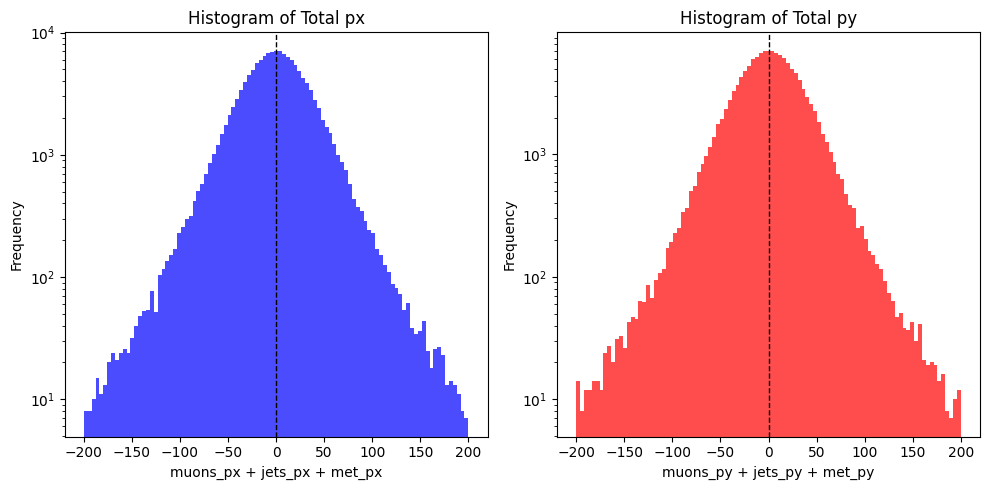

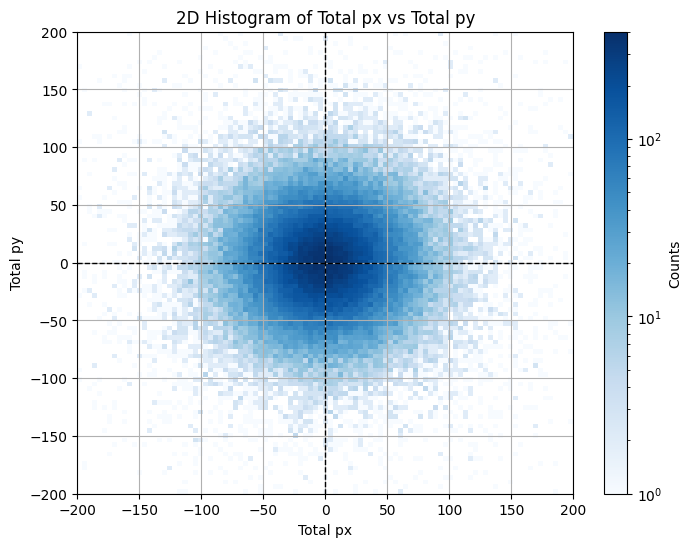

In [ ]:
total_px = muons_px + jets_px + met_px
total_py = muons_py + jets_py + met_py

print("Total px:", total_px)
print("Total py:", total_py)


bins=np.linspace(-200, 200, 100)
# plot histo of total px and py
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(total_px, bins=bins, alpha=0.7, label='Total px', color='blue')
plt.xlabel('muons_px + jets_px + met_px')
plt.ylabel('Frequency')
plt.yscale('log')
#draw line at 0
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.title('Histogram of Total px')
plt.subplot(1, 2, 2)
plt.hist(total_py, bins=bins, alpha=0.7, label='Total py', color='red')
plt.xlabel('muons_py + jets_py + met_py')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.yscale('log')
plt.title('Histogram of Total py')
plt.tight_layout()
plt.show()



# plot the 2d histogram of px vs py
plt.figure(figsize=(8, 6))
plt.hist2d(total_px, total_py, bins=(bins, bins), cmap='Blues', cmin=1,norm=matplotlib.colors.LogNorm(),)
plt.colorbar(label='Counts')
# logarithmic color scale    
plt.xlabel('Total px')
plt.ylabel('Total py')
plt.title('2D Histogram of Total px vs Total py')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.grid()
plt.show()

# check if the muons are back-to-back with the jets

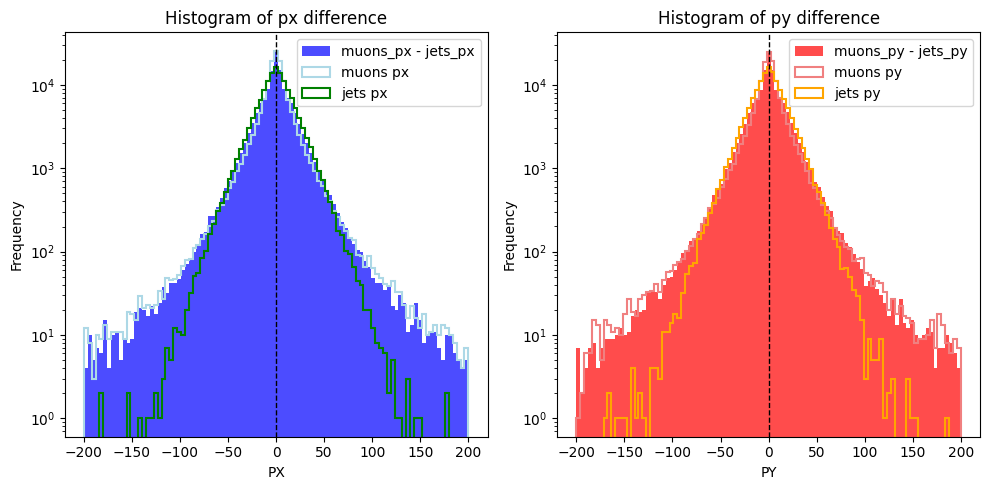

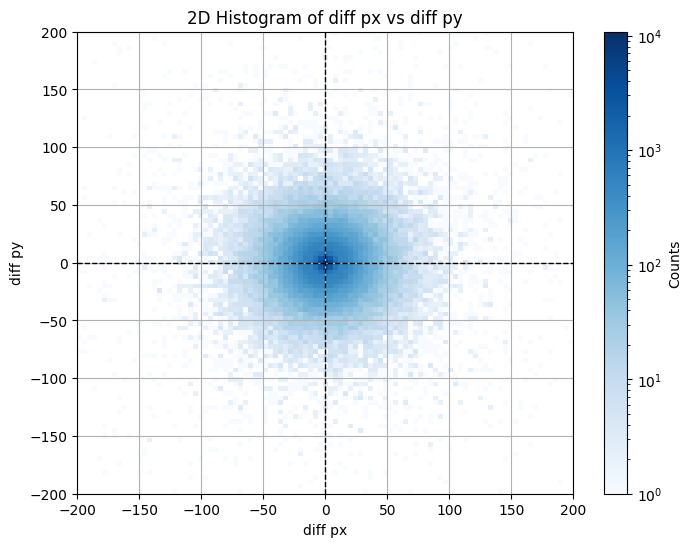

In [ ]:
px_diff=(muons_px - jets_px)
py_diff=(muons_py - jets_py)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(px_diff, bins=bins, alpha=0.7, label='muons_px - jets_px', color='blue')
plt.hist(muons_px, bins=bins,histtype='step', color='lightblue', linewidth=1.5, label='muons px')
plt.hist(jets_px, bins=bins,histtype='step', color='green', linewidth=1.5, label='jets px')
plt.xlabel('PX')
plt.ylabel('Frequency')
plt.yscale('log')
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.title('Histogram of px difference')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(py_diff, bins=bins, alpha=0.7, label='muons_py - jets_py', color='red')
plt.hist(muons_py, bins=bins,histtype='step', color='lightcoral', linewidth=1.5, label='muons py')
plt.hist(jets_py, bins=bins,histtype='step', color='orange', linewidth=1.5, label='jets py')
plt.xlabel('PY')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.yscale('log')
plt.title('Histogram of py difference')
plt.tight_layout()
plt.legend()
plt.show()


# plot the 2d histogram of px vs py
plt.figure(figsize=(8, 6))
plt.hist2d(px_diff, py_diff, bins=(bins, bins), cmap='Blues', cmin=1,norm=matplotlib.colors.LogNorm(),)
plt.colorbar(label='Counts')
# logarithmic color scale    
plt.xlabel('diff px')
plt.ylabel('diff py')
plt.title('2D Histogram of diff px vs diff py')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.grid()
plt.show()


/work/mmalucch/micromamba/envs/pocket-coffea/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


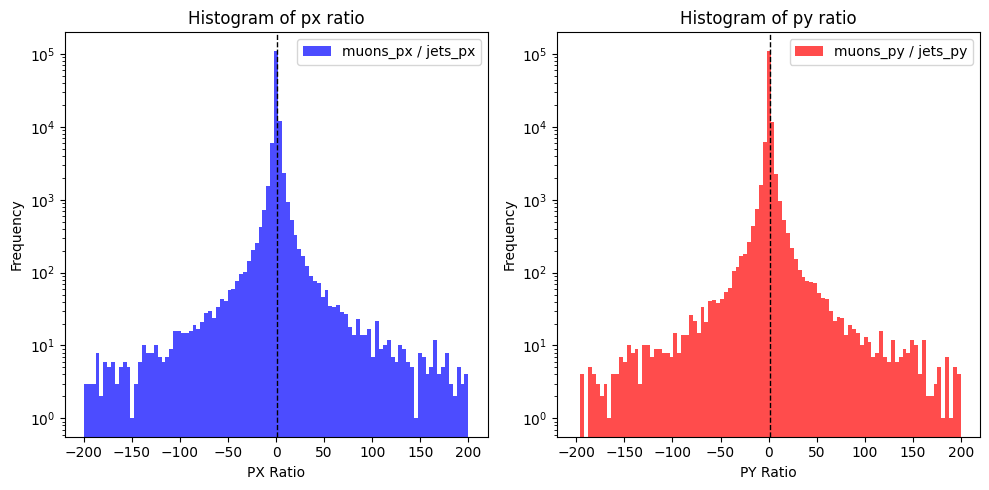

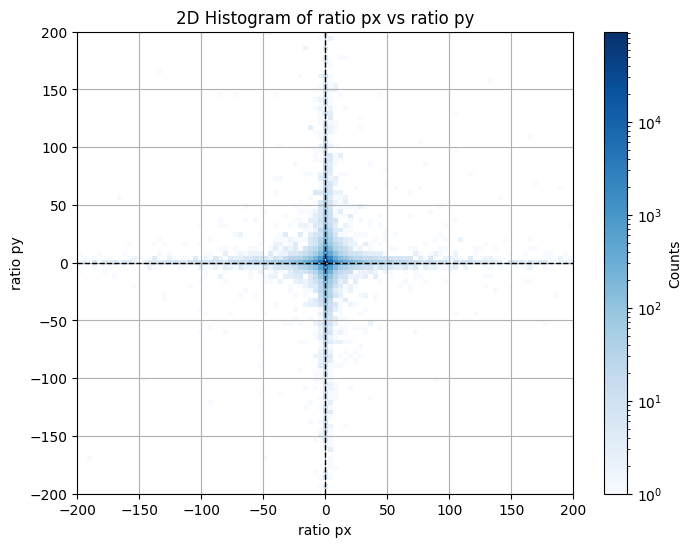

In [ ]:
ratio_px = muons_px / jets_px
ratio_py = muons_py / jets_py

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(ratio_px, bins=bins, alpha=0.7, label='muons_px / jets_px', color='blue')
plt.xlabel('PX Ratio')
plt.ylabel('Frequency')
plt.yscale('log')
plt.axvline(1, color='black', linestyle='dashed', linewidth=1)
plt.title('Histogram of px ratio')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(ratio_py, bins=bins, alpha=0.7, label='muons_py / jets_py', color='red')
plt.xlabel('PY Ratio')
plt.ylabel('Frequency')
plt.axvline(1, color='black', linestyle='dashed', linewidth=1)
plt.yscale('log')
plt.title('Histogram of py ratio')
plt.tight_layout()
plt.legend()
plt.show()



# plot the 2d histogram of px vs py
plt.figure(figsize=(8, 6))
plt.hist2d(ratio_px, ratio_py, bins=(bins, bins), cmap='Blues', cmin=1,norm=matplotlib.colors.LogNorm(),)
plt.colorbar(label='Counts')
# logarithmic color scale    
plt.xlabel('ratio px')
plt.ylabel('ratio py')
plt.title('2D Histogram of ratio px vs ratio py')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.grid()
plt.show()

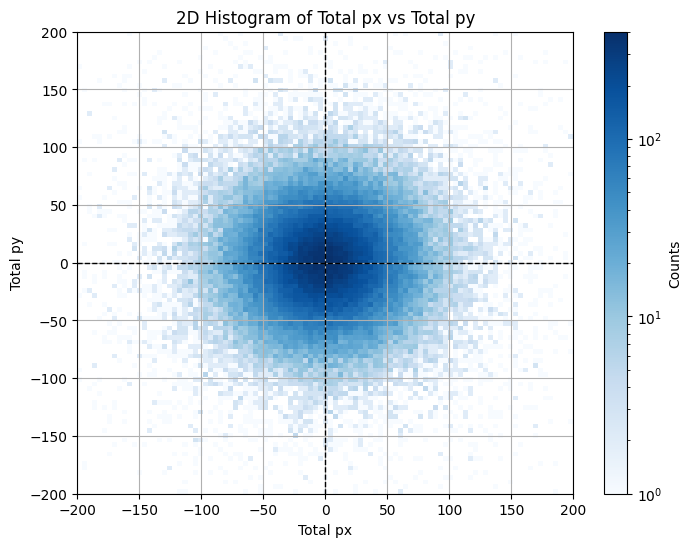

In [ ]:

# plot the 2d histogram of px vs py
plt.figure(figsize=(8, 6))
plt.hist2d(total_px, total_py, bins=(bins, bins), cmap='Blues', cmin=1,norm=matplotlib.colors.LogNorm(),)
plt.colorbar(label='Counts')
# logarithmic color scale    
plt.xlabel('Total px')
plt.ylabel('Total py')
plt.title('2D Histogram of Total px vs Total py')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.grid()
plt.show()

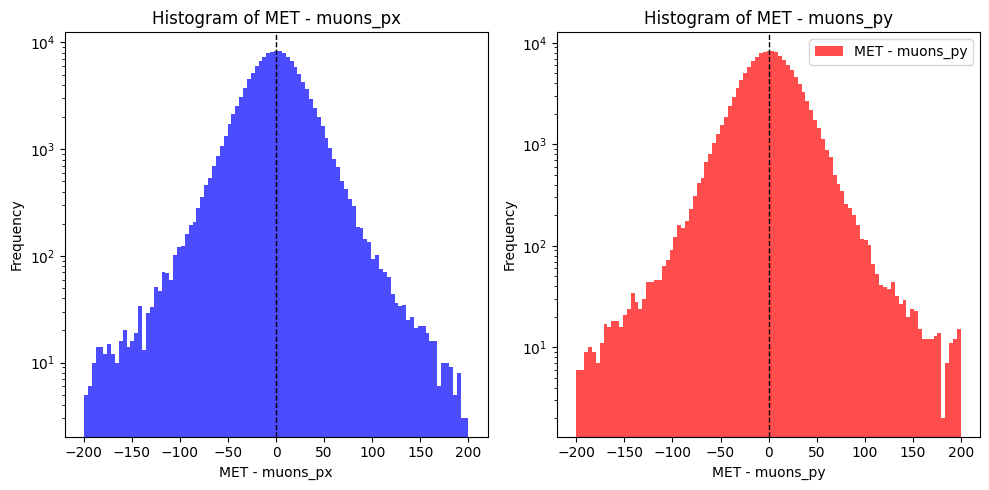

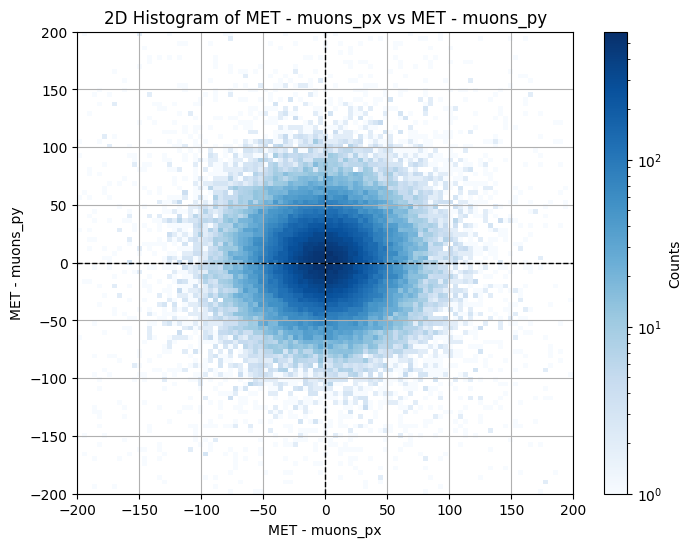

In [ ]:
met_minusMuon_px = met_px + muons_px
met_minusMuon_py = met_py + muons_py

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(met_minusMuon_px, bins=bins, alpha=0.7, label='MET - muons_px', color='blue')
plt.xlabel('MET - muons_px')
plt.ylabel('Frequency')
plt.yscale('log')
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.title('Histogram of MET - muons_px')
plt.subplot(1, 2, 2)
plt.hist(met_minusMuon_py, bins=bins, alpha=0.7, label='MET - muons_py', color='red')
plt.xlabel('MET - muons_py')
plt.ylabel('Frequency')
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.yscale('log')
plt.title('Histogram of MET - muons_py')
plt.tight_layout()
plt.legend()
plt.show()


# plot the 2d histogram of px vs py
plt.figure(figsize=(8, 6))
plt.hist2d(met_minusMuon_px, met_minusMuon_py, bins=(bins, bins), cmap='Blues', cmin=1,norm=matplotlib.colors.LogNorm(),)
plt.colorbar(label='Counts')
# logarithmic color scale
plt.xlabel('MET - muons_px')
plt.ylabel('MET - muons_py')
plt.title('2D Histogram of MET - muons_px vs MET - muons_py')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.grid()
plt.show()


    

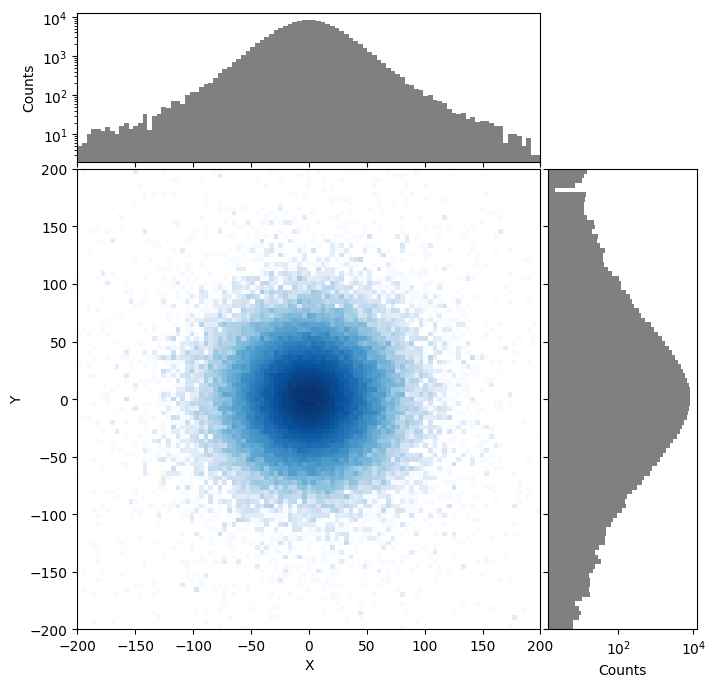

In [ ]:
# Create figure and gridspec layout
fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(4, 4, hspace=0.05, wspace=0.05)

# Main 2D histogram
ax_main = fig.add_subplot(gs[1: , 0:3])

# X projection (top)
ax_xproj = fig.add_subplot(gs[0, 0:3], sharex=ax_main)

# Y projection (right)
ax_yproj = fig.add_subplot(gs[1:, 3], sharey=ax_main)

# 2D histogram
hist, xedges, yedges, img = ax_main.hist2d(met_minusMuon_px, met_minusMuon_py, bins=bins, cmap='Blues', cmin=1, norm=matplotlib.colors.LogNorm())

# X projection
ax_xproj.hist(met_minusMuon_px, bins=xedges, color='gray')
ax_xproj.set_ylabel('Counts')
ax_xproj.tick_params(labelbottom=False)
ax_xproj.set_yscale('log')

# Y projection
ax_yproj.hist(met_minusMuon_py, bins=yedges, orientation='horizontal', color='gray')
ax_yproj.set_xlabel('Counts')
ax_yproj.tick_params(labelleft=False)
ax_yproj.set_xscale('log')

# Labels
ax_main.set_xlabel('X')
ax_main.set_ylabel('Y')

plt.show()

/tmp/ipykernel_1642056/2370265857.py:20: RuntimeWarning: divide by zero encountered in divide
  ratio_met_minusMuon = met_minusMuon_hist / met_hist
/tmp/ipykernel_1642056/2370265857.py:21: RuntimeWarning: divide by zero encountered in divide
  ratio_met_minusJet = met_minusJet_hist / met_hist
/tmp/ipykernel_1642056/2370265857.py:21: RuntimeWarning: invalid value encountered in divide
  ratio_met_minusJet = met_minusJet_hist / met_hist
/tmp/ipykernel_1642056/2370265857.py:22: RuntimeWarning: divide by zero encountered in divide
  ratio_total = total_hist / met_hist


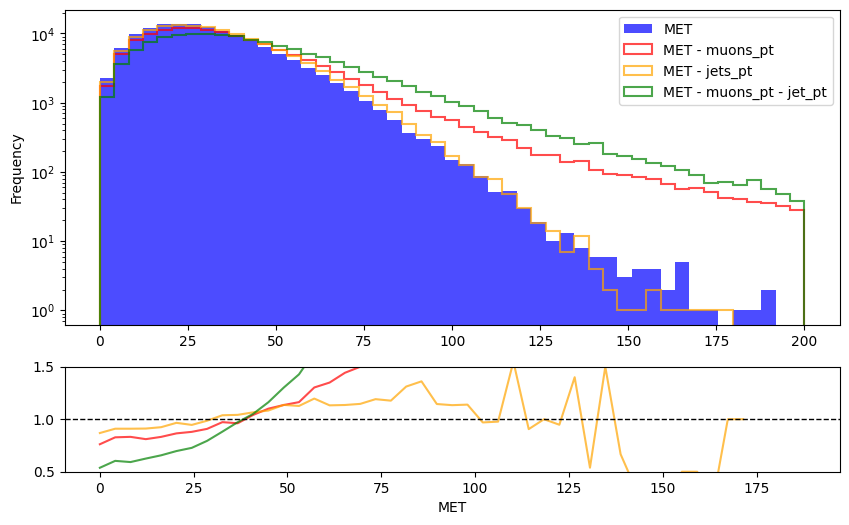

In [ ]:
bins=np.linspace(0, 200, 50)

met_minusMuon_pt = np.sqrt(met_minusMuon_px**2 + met_minusMuon_py**2)
total_pt = np.sqrt(total_px**2 + total_py**2)
met_minusJet_px = met_px + jets_px
met_minusJet_py = met_py + jets_py
met_minusJet_pt = np.sqrt(met_minusJet_px**2 + met_minusJet_py**2)

fig, (ax, ax_ratio) = plt.subplots(figsize=(10, 6), nrows=2, ncols=1, gridspec_kw={'height_ratios': [3, 1]})
ax.hist(met.pt, bins=bins, alpha=0.7, label='MET', color='blue')
ax.hist(met_minusMuon_pt, bins=bins, alpha=0.7, label='MET - muons_pt', histtype='step', color='red', linewidth=1.5)
ax.hist(met_minusJet_pt, bins=bins, alpha=0.7, label='MET - jets_pt', histtype='step', color='orange', linewidth=1.5)
ax.hist(total_pt, bins=bins, alpha=0.7, label='MET - muons_pt - jet_pt', histtype='step', color='green', linewidth=1.5)

#ratio histo to met
met_hist = np.histogram(met.pt, bins=bins)[0]
met_minusMuon_hist = np.histogram(met_minusMuon_pt, bins=bins)[0]
met_minusJet_hist = np.histogram(met_minusJet_pt, bins=bins)[0]
total_hist = np.histogram(total_pt, bins=bins)[0]
ratio_met_minusMuon = met_minusMuon_hist / met_hist
ratio_met_minusJet = met_minusJet_hist / met_hist
ratio_total = total_hist / met_hist

ax_ratio.plot(bins[:-1], ratio_met_minusMuon,  alpha=0.7, label='MET - muons_pt / MET', color='red')
ax_ratio.plot(bins[:-1], ratio_met_minusJet,  alpha=0.7, label='MET - jets_pt / MET', color='orange')
ax_ratio.plot(bins[:-1], ratio_total,  alpha=0.7, label='Total / MET', color='green')
ax_ratio.set_ylim(0.5, 1.5)
# horizontal line at 1
ax_ratio.axhline(1, color='black', linestyle='dashed', linewidth=1)


plt.xlabel('MET')
ax.set_ylabel('Frequency')
ax.set_yscale('log')
ax.legend()
plt.show()



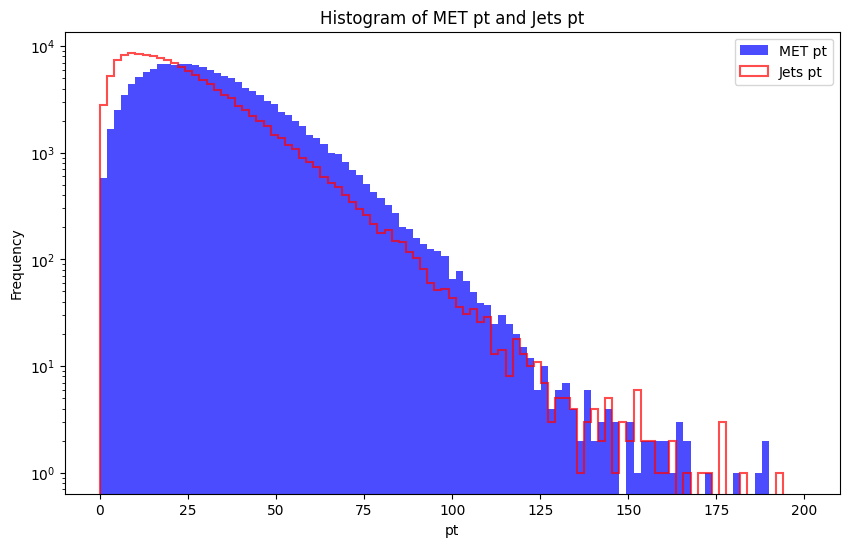

In [ ]:
#plot met pt and jet pt
plt.figure(figsize=(10, 6))
plt.hist(met.pt, bins=np.linspace(0, 200, 100), alpha=0.7, label='MET pt', color='blue')
plt.hist(np.sqrt(jets_px**2 + jets_py**2), bins=np.linspace(0, 200, 100), alpha=0.7, label='Jets pt', histtype='step', color='red', linewidth=1.5)
plt.xlabel('pt')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Histogram of MET pt and Jets pt')
plt.legend()
plt.show()